In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import cv2
from PIL import Image
import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#setting main folder

main_fol = "dataset-resized/"

In [4]:
# train and test folders

train_folder = os.path.join(main_fol, "train")
test_folder = os.path.join(main_fol, "test")

In [5]:
#different waste kinds image path

cardboard_train_images = glob.glob(train_folder+"/cardboard/*.jpg")
glass_train_images = glob.glob(train_folder+"/glass/*.jpg")
metal_train_images = glob.glob(train_folder+"/metal/*.jpg")
paper_train_images = glob.glob(train_folder+"/paper/*.jpg")
plastic_train_images = glob.glob(train_folder+"/plastic/*.jpg")
trash_train_images = glob.glob(train_folder+"/trash/*.jpg")

cardboard_test_images = glob.glob(test_folder+"/cardboard/*.jpg")
glass_test_images = glob.glob(test_folder+"/glass/*.jpg")
metal_test_images = glob.glob(test_folder+"/metal/*.jpg")
paper_test_images = glob.glob(test_folder+"/paper/*.jpg")
plastic_test_images = glob.glob(test_folder+"/plastic/*.jpg")
trash_test_images = glob.glob(test_folder+"/trash/*.jpg")

'dataset-resized/test'

In [6]:
#creating training and test dataframes

train_list = [x for x in trash_train_images]
train_list.extend([x for x in plastic_train_images])
train_list.extend([x for x in paper_train_images])
train_list.extend([x for x in metal_train_images])
train_list.extend([x for x in glass_train_images])
train_list.extend([x for x in cardboard_train_images])

df_train = pd.DataFrame(np.concatenate([[0]*len(trash_train_images),
                                        [1]*len(plastic_train_images),
                                        [2]*len(paper_train_images),
                                        [3]*len(metal_train_images),
                                        [4]*len(glass_train_images),
                                        [5]*len(cardboard_train_images)]), columns =["label"])
df_train["image"] = [x for x in train_list]

test_list = [x for x in trash_test_images]
test_list.extend([x for x in plastic_test_images])
test_list.extend([x for x in paper_test_images])
test_list.extend([x for x in metal_test_images])
test_list.extend([x for x in glass_test_images])
test_list.extend([x for x in cardboard_test_images])

df_test = pd.DataFrame(np.concatenate([[0]*len(trash_test_images),
                                        [1]*len(plastic_test_images),
                                        [2]*len(paper_test_images),
                                        [3]*len(metal_test_images),
                                        [4]*len(glass_test_images),
                                        [5]*len(cardboard_test_images)]), columns =["label"])
df_test["image"] = [x for x in test_list]

In [7]:
class_names = {
    0:'Trash',
    1:'Plastic',
    2:'Paper',
    3:'Metal',
    4:'Glass',
    5:'Cardboard'
}

In [8]:
df_train['class'] = df_train['label'].map(class_names)
df_test['class'] = df_test['label'].map(class_names)

In [ ]:
df_train

,label,image,class


In [ ]:
df_test

,label,image,class
0,0,dataset-resized/test/trash\trash100.jpg,Trash
1,0,dataset-resized/test/trash\trash101.jpg,Trash
2,0,dataset-resized/test/trash\trash102.jpg,Trash
3,0,dataset-resized/test/trash\trash103.jpg,Trash
4,0,dataset-resized/test/trash\trash104.jpg,Trash
...,...,...,...
499,5,dataset-resized/test/cardboard\cardboard231.jpg,Cardboard
500,5,dataset-resized/test/cardboard\cardboard232.jpg,Cardboard
501,5,dataset-resized/test/cardboard\cardboard233.jpg,Cardboard
502,5,dataset-resized/test/cardboard\cardboard234.jpg,Cardboard


ValueError: ignored

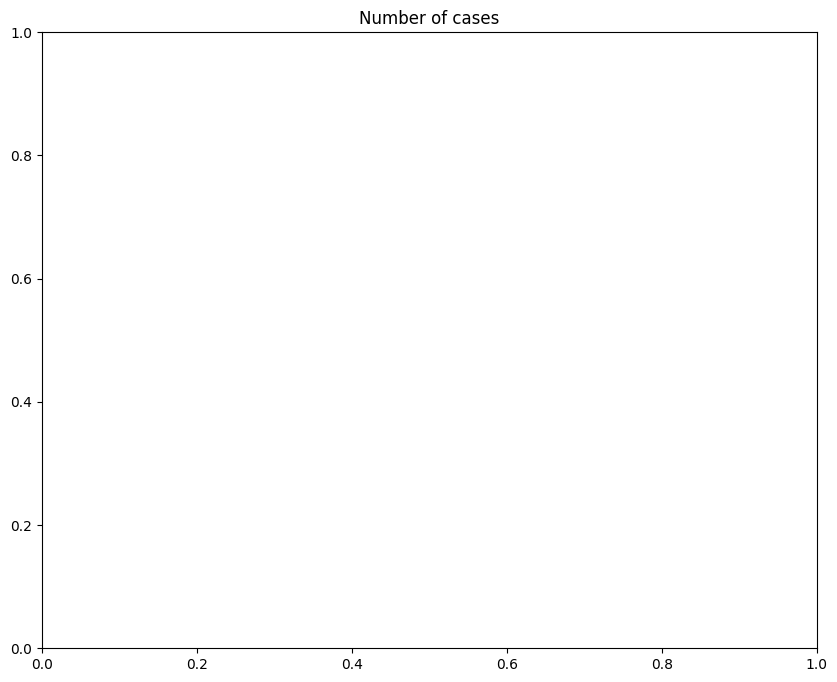

In [ ]:
plt.figure(figsize=(10,8))  # 10 inches by 8 inches

plt.title("Number of cases", fontsize=12)
sns.countplot(x=df_train["class"], data=df_train)

plt.show()

IndexError: list index out of range

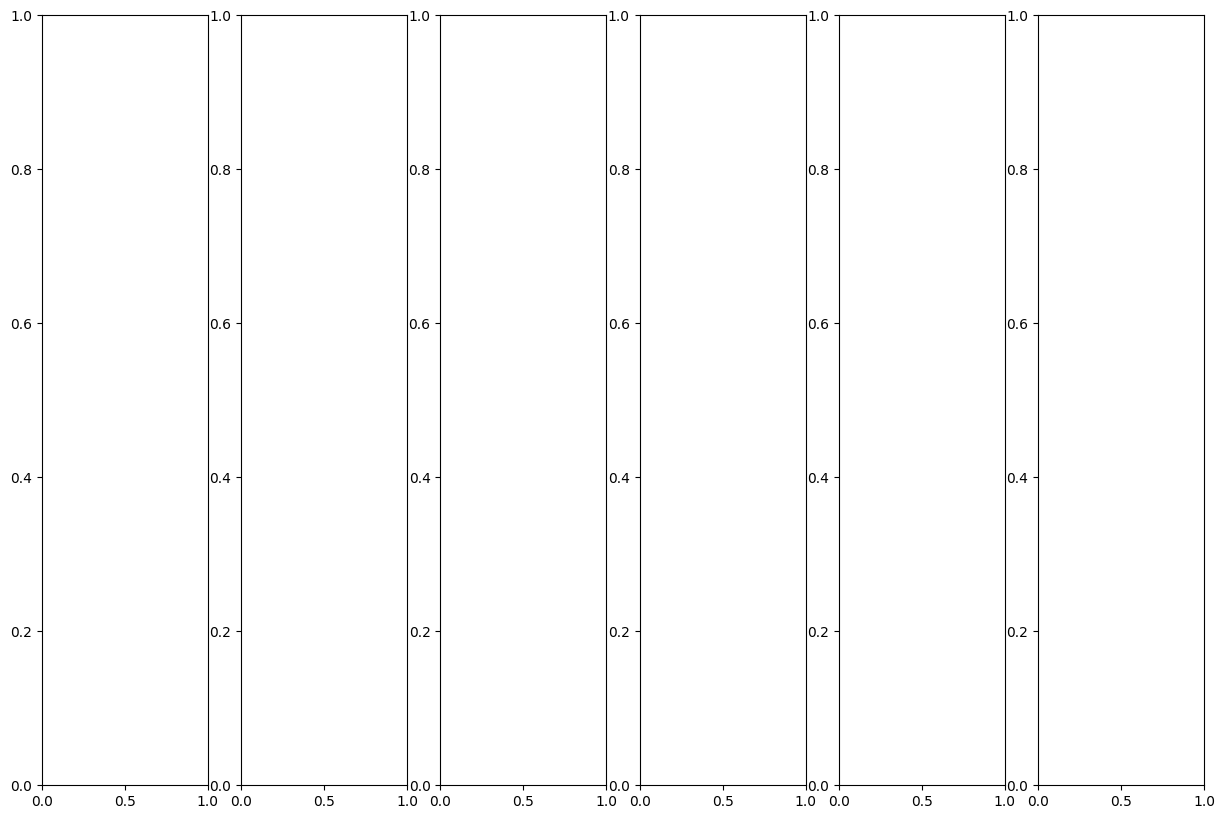

In [9]:
#trash images

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    img = cv2.imread(trash_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Trash")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

#plastic images

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    img = cv2.imread(plastic_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Plastic")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

#paper images

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    img = cv2.imread(paper_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Paper")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

#metal images

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    img = cv2.imread(metal_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Metal")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

#glass images

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    img = cv2.imread(glass_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Glass")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

#cardboard images

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    img = cv2.imread(cardboard_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Cardboard")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

In [10]:
from sklearn .model_selection import train_test_split

train_df, val_df = train_test_split(df_train, test_size=0.2, random_state=13, stratify=df_train["class"])

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
val_df

,label,image,class
1656,4,dataset-resized/train/glass\glass59.jpg,Glass
416,1,dataset-resized/train/plastic\plastic408.jpg,Plastic
127,1,dataset-resized/train/plastic\plastic136.jpg,Plastic
633,2,dataset-resized/train/paper\paper222.jpg,Paper
411,1,dataset-resized/train/plastic\plastic403.jpg,Plastic
...,...,...,...
105,0,dataset-resized/train/trash\trash87.jpg,Trash
100,0,dataset-resized/train/trash\trash82.jpg,Trash
267,1,dataset-resized/train/plastic\plastic262.jpg,Plastic
374,1,dataset-resized/train/plastic\plastic367.jpg,Plastic


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                rescale=1/255)
val_datagen = ImageDataGenerator(
                rescale=1/255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
                    train_df,
                    x_col="image",
                    y_col="class",
                    target_size=(150,150),
                    batch_size=32,
                    class_mode="sparse",
                    seed=7)

Found 1618 validated image filenames belonging to 6 classes.


In [ ]:
val_generator = val_datagen.flow_from_dataframe(
                    val_df,
                    x_col="image",
                    y_col="class",
                    target_size=(150,150),
                    batch_size=32,
                    class_mode="sparse",
                    seed=7)

test_generator = val_datagen.flow_from_dataframe(
                    df_test,
                    x_col="image",
                    y_col="class",
                    target_size=(150,150),
                    batch_size=32,
                    class_mode="sparse",
                    shuffle=False,
                    seed=7)

Found 405 validated image filenames belonging to 6 classes.
Found 504 validated image filenames belonging to 6 classes.


In [ ]:
#importing the necessary packages

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
#building the cnn

model = Sequential()

#convolution
model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu", input_shape=(150,150,3)))

#pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd Conv
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))

#2nd pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd Conv
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))

#3rd pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#flatten
model.add(Flatten())

#fully connected layer
model.add(Dense(64, activation="relu"))

model.add(Dense(6, activation="softmax"))   #clasificacion binaria->1 y sigmoid varias clases->num de clases y softmax

In [ ]:
#compiling
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=["accuracy"])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
#import tensorflow as tf
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate=0.01,
#   decay_steps=10000,
#    decay_rate=0.9)
#learning_rate = 0.001
#epochs=10
#opt= tf.keras.optimizers.Adam(learning_rate=lr_schedule)
#model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
#aug = tf.keras.preprocessing.image.ImageDataGenerator(
#          rotation_range=10,
#          zoom_range=0.15,
#          width_shift_range=0.1,
#          height_shift_range=0.1,
#          shear_range=0.15,
#          horizontal_flip= False,
#          vertical_flip= False,
#          fill_mode="nearest"
#          )

#X_train = tf.random.normal((50, 256, 256, 3))
#y_train = tf.random.uniform((50, ), maxval=3, dtype=tf.int32)

In [ ]:
model_1 = model.fit(
                    train_generator,
                    epochs = 50,
                    validation_data=val_generator,
                    callbacks=[checkpoint_cb])

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.7282 - accuracy: 0.2274

C:\Users\naiar\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


51/51 [==============================] - 32s 611ms/step - loss: 1.7282 - accuracy: 0.2274 - val_loss: 1.7162 - val_accuracy: 0.2346
Epoch 2/50
51/51 [==============================] - 22s 425ms/step - loss: 1.7110 - accuracy: 0.2478 - val_loss: 1.7128 - val_accuracy: 0.2346
Epoch 3/50
51/51 [==============================] - 18s 350ms/step - loss: 1.7071 - accuracy: 0.2447 - val_loss: 1.7081 - val_accuracy: 0.2370
Epoch 4/50
51/51 [==============================] - 19s 363ms/step - loss: 1.7022 - accuracy: 0.2497 - val_loss: 1.7038 - val_accuracy: 0.2420
Epoch 5/50
51/51 [==============================] - 19s 374ms/step - loss: 1.6974 - accuracy: 0.2503 - val_loss: 1.7006 - val_accuracy: 0.2716
Epoch 6/50
51/51 [==============================] - 20s 384ms/step - loss: 1.6938 - accuracy: 0.2614 - val_loss: 1.6955 - val_accuracy: 0.2469
Epoch 7/50
51/51 [==============================] - 20s 387ms/step - loss: 1.6872 - accuracy: 0.2664 - val_loss: 1.6903 - val_accuracy: 0.2543
Epoch 8/50

Text(0.5, 1.0, 'Accuracy Evolution')

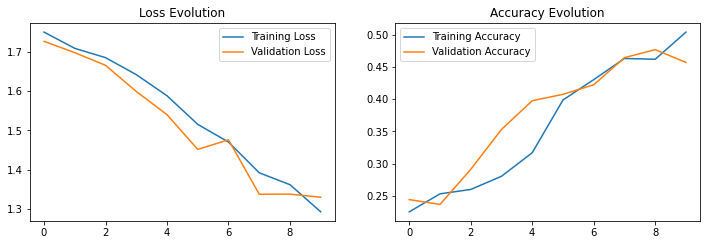

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(model_1.history['loss'], label="Training Loss")
plt.plot(model_1.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Evolution")

plt.subplot(2,2,2)
plt.plot(model_1.history['accuracy'], label="Training Accuracy")
plt.plot(model_1.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Evolution")

In [ ]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"TrainAccuracy: {evaluation[1] * 100:.2f}%")

16/16 [==============================] - 3s 162ms/step - loss: 1.5417 - accuracy: 0.3790
Test Accuracy: 37.90%
51/51 [==============================] - 7s 126ms/step - loss: 1.2637 - accuracy: 0.5043
TrainAccuracy: 50.43%


In [ ]:
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

16/16 [==============================] - 2s 122ms/step


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)

# compute the confusion matrix
classification_report = classification_report(y_true, y_pred_classes)

print(classification_report)

              precision    recall  f1-score   support

           0       0.16      0.83      0.27        81
           1       0.20      0.01      0.02       100
           2       0.00      0.00      0.00        82
           3       0.64      0.44      0.52       118
           4       0.00      0.00      0.00        96
           5       0.00      0.00      0.00        27

    accuracy                           0.24       504
   macro avg       0.17      0.21      0.14       504
weighted avg       0.22      0.24      0.17       504



C:\Users\naiar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\naiar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\naiar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hasta ahí modelo con muy mala precisión

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

NameError: name 'train_ds' is not defined

<Figure size 720x720 with 0 Axes>

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras import layers

normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
51/51 [==============================] - 21s 406ms/step - loss: 1.5903 - accuracy: 0.3329 - val_loss: 1.4257 - val_accuracy: 0.3837
Epoch 2/10
51/51 [==============================] - 30s 581ms/step - loss: 1.2316 - accuracy: 0.5120 - val_loss: 1.2407 - val_accuracy: 0.5074
Epoch 3/10
51/51 [==============================] - 31s 604ms/step - loss: 1.0543 - accuracy: 0.6103 - val_loss: 1.2450 - val_accuracy: 0.4876
Epoch 4/10
51/51 [==============================] - 27s 537ms/step - loss: 0.8577 - accuracy: 0.6831 - val_loss: 1.2787 - val_accuracy: 0.5842
Epoch 5/10
51/51 [==============================] - 30s 586ms/step - loss: 0.7277 - accuracy: 0.7443 - val_loss: 1.4922 - val_accuracy: 0.5025
Epoch 6/10
51/51 [==============================] - 34s 663ms/step - loss: 0.5912 - accuracy: 0.7869 - val_loss: 1.4584 - val_accuracy: 0.5470
Epoch 7/10
51/51 [==============================] - 34s 664ms/step - loss: 0.4011 - accuracy: 0.8697 - val_loss: 1.5812 - val_accuracy: 0.5545

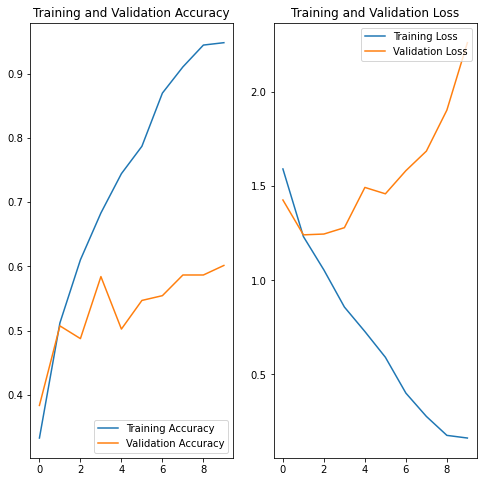

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

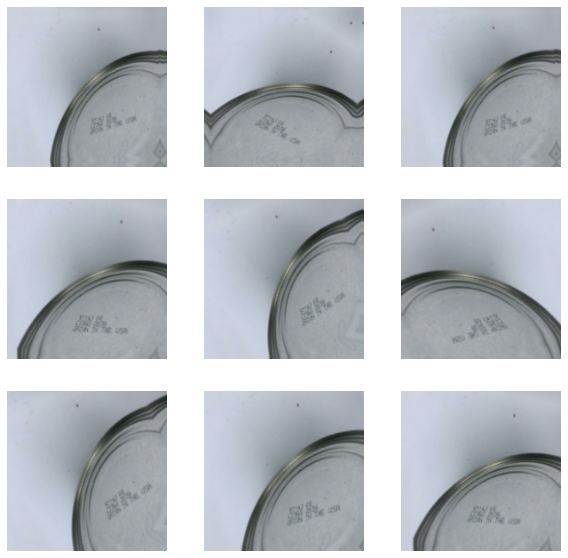

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
51/51 [==============================] - 31s 599ms/step - loss: 1.6614 - accuracy: 0.2952 - val_loss: 1.4260 - val_accuracy: 0.4059
Epoch 2/15
51/51 [==============================] - 37s 725ms/step - loss: 1.3496 - accuracy: 0.4447 - val_loss: 1.4167 - val_accuracy: 0.4109
Epoch 3/15
51/51 [==============================] - 34s 666ms/step - loss: 1.2649 - accuracy: 0.4966 - val_loss: 1.3891 - val_accuracy: 0.4777
Epoch 4/15
51/51 [==============================] - 36s 715ms/step - loss: 1.1538 - accuracy: 0.5540 - val_loss: 1.2080 - val_accuracy: 0.5371
Epoch 5/15
51/51 [==============================] - 37s 734ms/step - loss: 1.0900 - accuracy: 0.5757 - val_loss: 1.3776 - val_accuracy: 0.4901
Epoch 6/15
51/51 [==============================] - 34s 662ms/step - loss: 1.0207 - accuracy: 0.6201 - val_loss: 1.2108 - val_accuracy: 0.5470
Epoch 7/15
51/51 [==============================] - 34s 667ms/step - loss: 1.0299 - accuracy: 0.6127 - val_loss: 1.1144 - val_accuracy: 0.6040

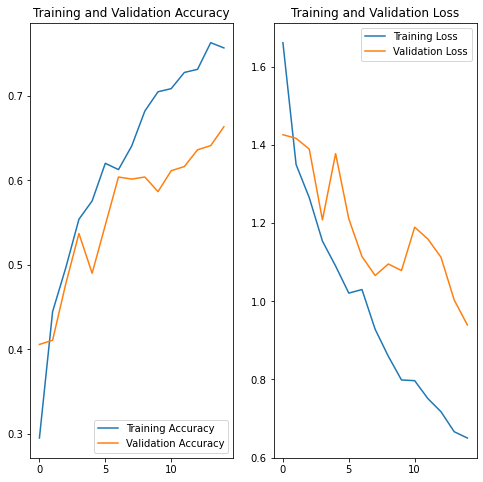

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
glass_path = "dataset-resized/test/metal/metal213.jpg"

img = tf.keras.utils.load_img(
    glass_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 88ms/step
This image most likely belongs to plastic with a 59.43 percent confidence.


In [ ]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"TrainAccuracy: {evaluation[1] * 100:.2f}%")

InvalidArgumentError: Graph execution error:

Detected at node 'Squeeze' defined at (most recent call last):
    File "C:\Users\naiar\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\naiar\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\naiar\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\naiar\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\naiar\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\naiar\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\naiar\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\naiar\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\naiar\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\naiar\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\naiar\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\naiar\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\naiar\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\naiar\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\naiar\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\naiar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\naiar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\naiar\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\naiar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\naiar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\naiar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_16372/2553477942.py", line 1, in <module>
      evaluation = model.evaluate(test_generator)
    File "C:\Users\naiar\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\naiar\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2200, in evaluate
      logs = test_function_runner.run_step(
    File "C:\Users\naiar\anaconda3\lib\site-packages\keras\src\engine\training.py", line 4000, in run_step
      tmp_logs = self._function(dataset_or_iterator)
    File "C:\Users\naiar\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1972, in test_function
      return step_function(self, iterator)
    File "C:\Users\naiar\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1956, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\naiar\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1944, in run_step
      outputs = model.test_step(data)
    File "C:\Users\naiar\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1853, in test_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\naiar\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1179, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\naiar\anaconda3\lib\site-packages\keras\src\engine\compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\naiar\anaconda3\lib\site-packages\keras\src\utils\metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\naiar\anaconda3\lib\site-packages\keras\src\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "C:\Users\naiar\anaconda3\lib\site-packages\keras\src\metrics\base_metric.py", line 723, in update_state
      matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\naiar\anaconda3\lib\site-packages\keras\src\metrics\accuracy_metrics.py", line 459, in sparse_categorical_accuracy
      matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "C:\Users\naiar\anaconda3\lib\site-packages\keras\src\utils\metrics_utils.py", line 960, in sparse_categorical_matches
      y_true = tf.squeeze(y_true, [-1])
Node: 'Squeeze'
Can not squeeze dim[1], expected a dimension of 1, got 6
	 [[{{node Squeeze}}]] [Op:__inference_test_function_18585]